# Read training data file

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
import utils

In [2]:
print('Reading Data...')
data = pd.read_csv('train_minimal_128.csv',header = 0, index_col=0)
data.head()

Reading Data...


,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type,0,1,2,3,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,000016.jpg,-1,-1,1,-1,0,23,23,23,23,...,29,30,30,30,31,32,33,34,33,32
1,000025.jpg,-1,-1,-1,-1,0,85,89,88,81,...,79,75,77,71,72,75,77,82,81,75
2,000026.jpg,-1,-1,-1,-1,0,172,169,175,184,...,74,96,96,99,112,129,122,87,61,62
3,000028.jpg,-1,-1,1,-1,0,233,231,231,234,...,178,184,187,186,191,191,193,191,187,187
4,000037.jpg,-1,-1,-1,1,0,77,76,74,73,...,57,57,57,57,57,57,57,57,57,57


In [3]:
X_train = data.drop(['Image','Eyeglasses','Mustache','Smiling','Wearing_Hat','Type'], axis=1)
#X_train = X_train.astype(np.float64)
#X_train = X_train.values/ 255.0
#X_train = np.array(X_train)
print(X_train.head())
X_train = (X_train.values).astype('float32') # all pixel values

     0    1    2    3    4    5    6    7    8    9  ...    16374  16375  \
0   23   23   23   23   23   23   23   23   23   23  ...       29     30   
1   85   89   88   81   82   84   80   82   82   84  ...       79     75   
2  172  169  175  184  181  170  166  166  180  189  ...       74     96   
3  233  231  231  234  234  234  231  228  227  229  ...      178    184   
4   77   76   74   73   73   74   73   74   74   74  ...       57     57   

   16376  16377  16378  16379  16380  16381  16382  16383  
0     30     30     31     32     33     34     33     32  
1     77     71     72     75     77     82     81     75  
2     96     99    112    129    122     87     61     62  
3    187    186    191    191    193    191    187    187  
4     57     57     57     57     57     57     57     57  

[5 rows x 16384 columns]


In [4]:
Y_train = data[['Eyeglasses','Mustache','Smiling','Wearing_Hat']]
print(Y_train.head())
Y_train = Y_train.apply(utils.create_digits, axis = 1)
Y_train.value_counts()

   Eyeglasses  Mustache  Smiling  Wearing_Hat
0          -1        -1        1           -1
1          -1        -1       -1           -1
2          -1        -1       -1           -1
3          -1        -1        1           -1
4          -1        -1       -1            1


4    2000
3    2000
2    2000
1    2000
0    2000
dtype: int64

# Train model

In [5]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout

Using Theano backend.


In [6]:
# read training data and test data
data_verify = pd.read_csv('verify_minimal_128.csv',header = 0, index_col=0)
data_verify.head()

,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type,0,1,2,3,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,162783.jpg,-1,-1,-1,-1,1,206,206,206,206,...,214,215,216,215,215,214,213,213,213,213
1,162807.jpg,1,-1,-1,-1,1,100,101,93,80,...,33,28,31,33,30,30,37,38,34,33
2,162813.jpg,-1,-1,1,-1,1,58,58,56,57,...,41,40,40,40,41,42,43,43,43,43
3,162827.jpg,-1,-1,-1,-1,1,79,77,77,80,...,176,199,196,188,168,143,145,150,170,180
4,162844.jpg,-1,-1,-1,1,1,42,42,42,42,...,204,204,204,204,204,205,206,206,206,206


In [7]:
X_test = data_verify.drop(['Image','Eyeglasses','Mustache','Smiling','Wearing_Hat','Type'], axis=1)
#X_train = X_train.astype(np.float64)
#X_train = X_train.values/ 255.0
#X_test = np.array(X_test)
X_test = (X_test.values).astype('float32')

Y_test = data_verify[['Eyeglasses','Mustache','Smiling','Wearing_Hat']]
Y_test = Y_test.apply(utils.create_digits, axis = 1)
Y_test.value_counts()

4    400
3    400
2    400
1    400
0    400
dtype: int64

In [8]:
# convert list of labels to binary class matrix
y_train = np_utils.to_categorical(Y_train) 
y_test = np_utils.to_categorical(Y_test) 

# pre-processing: divide by max and substract mean
scale = np.max(X_train)
X_train /= scale
X_test /= scale

#mean = np.std(X_train).astype(np.int64)
#X_train -= mean
#X_test -= mean

input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]

In [9]:
model=Sequential()
#model.add(Dense(1024,activation='relu',input_dim=(128 *128)))
model.add(Dense(1024,activation='sigmoid',input_dim=(128 *128)))
#model.add(Dropout(0.15))
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.15))
model.add(Dense(5,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
print("Training...")
history=model.fit(X_train, y_train, nb_epoch=200, batch_size=64, validation_data = (X_test,y_test), verbose=2)

Training...
Train on 10000 samples, validate on 2000 samples
Epoch 1/200
113s - loss: 1.6694 - acc: 0.2381 - val_loss: 1.5560 - val_acc: 0.2965
Epoch 2/200
127s - loss: 1.5412 - acc: 0.2986 - val_loss: 1.5155 - val_acc: 0.3530
Epoch 3/200
130s - loss: 1.4643 - acc: 0.3548 - val_loss: 1.4258 - val_acc: 0.4055
Epoch 4/200
130s - loss: 1.3964 - acc: 0.4042 - val_loss: 1.3745 - val_acc: 0.4475
Epoch 5/200
133s - loss: 1.3958 - acc: 0.4109 - val_loss: 1.4429 - val_acc: 0.3865
Epoch 6/200
139s - loss: 1.3359 - acc: 0.4467 - val_loss: 1.4157 - val_acc: 0.4150
Epoch 7/200
141s - loss: 1.3069 - acc: 0.4790 - val_loss: 1.2713 - val_acc: 0.5215
Epoch 8/200
143s - loss: 1.2729 - acc: 0.4934 - val_loss: 1.4181 - val_acc: 0.4480
Epoch 9/200
147s - loss: 1.2454 - acc: 0.5141 - val_loss: 1.2374 - val_acc: 0.5655
Epoch 10/200
148s - loss: 1.1895 - acc: 0.5481 - val_loss: 1.2042 - val_acc: 0.5380
Epoch 11/200
148s - loss: 1.1572 - acc: 0.5603 - val_loss: 1.1713 - val_acc: 0.5550
Epoch 12/200
149s - loss

476s - loss: 0.6091 - acc: 0.7943 - val_loss: 0.9601 - val_acc: 0.6925
Epoch 99/200
486s - loss: 0.5582 - acc: 0.8195 - val_loss: 0.9750 - val_acc: 0.6965
Epoch 100/200
487s - loss: 0.5306 - acc: 0.8259 - val_loss: 0.9304 - val_acc: 0.7165
Epoch 101/200
491s - loss: 0.5698 - acc: 0.8095 - val_loss: 1.1073 - val_acc: 0.6705
Epoch 102/200
494s - loss: 0.6377 - acc: 0.7837 - val_loss: 0.8666 - val_acc: 0.7190
Epoch 103/200
496s - loss: 0.5670 - acc: 0.8050 - val_loss: 0.9349 - val_acc: 0.6965
Epoch 104/200
496s - loss: 0.5682 - acc: 0.8124 - val_loss: 0.9478 - val_acc: 0.6975
Epoch 105/200
492s - loss: 0.5682 - acc: 0.8182 - val_loss: 0.8681 - val_acc: 0.7185
Epoch 106/200
491s - loss: 0.5274 - acc: 0.8257 - val_loss: 0.9095 - val_acc: 0.7090
Epoch 107/200
492s - loss: 0.5515 - acc: 0.8217 - val_loss: 0.9081 - val_acc: 0.6970
Epoch 108/200
485s - loss: 0.5400 - acc: 0.8212 - val_loss: 0.8841 - val_acc: 0.7145
Epoch 109/200
476s - loss: 0.5356 - acc: 0.8250 - val_loss: 0.8961 - val_acc: 0.

457s - loss: 0.4514 - acc: 0.8628 - val_loss: 1.0089 - val_acc: 0.7000
Epoch 196/200
452s - loss: 0.5289 - acc: 0.8254 - val_loss: 1.0569 - val_acc: 0.6950
Epoch 197/200
452s - loss: 0.4440 - acc: 0.8643 - val_loss: 1.0155 - val_acc: 0.6885
Epoch 198/200
451s - loss: 0.4557 - acc: 0.8599 - val_loss: 0.9643 - val_acc: 0.7070
Epoch 199/200
458s - loss: 0.4375 - acc: 0.8670 - val_loss: 0.9729 - val_acc: 0.7200
Epoch 200/200
459s - loss: 0.4219 - acc: 0.8691 - val_loss: 0.9870 - val_acc: 0.7105


In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

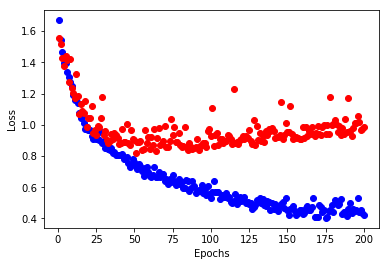

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'ro')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

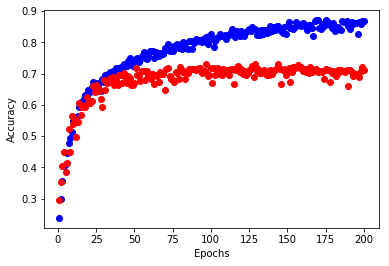

In [14]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'ro')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
print("Generating test predictions...")
preds = model.predict_classes(X_test, verbose=0)